
Mini Project: Advanced Statistical A.

Last Updated: June 26th, 2025

Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Master statistical analysis of financial data using NumPy and SciPy.
    Learn effective data visualization techniques with Matplotlib for financial trends.
    Apply hypothesis testing to financial datasets for meaningful insights.
    Understand and utilize advanced statistical techniques in NumPy and SciPy.


Project Description

Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:


Initial Data Exploration

    Load the dataset using Pandas. Check for null values and understand data types.
    Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization

    Utilize Matplotlib to plot closing prices and traded volume over time.
    Create a candlestick chart to depict high and low prices.


Statistical Analysis

    Compute summary statistics (mean, median, standard deviation) for key columns.
    Analyze closing prices with a moving average.


Hypothesis Testing

    Execute a t-test to compare average closing prices across different years.
    Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)

    Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
        E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
        Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources

    Dataset: download it here Apple Stock Prices From 1981 to 2023

It may include data such as date, opening price, closing price, high and low prices, and trading volume.

This information can be used to study trends and patterns in the stock market and make informed investment decisions.

    Date: Represents the date of the stock price.
    Open: Represents the opening stock price on that date.
    High: Represents the highest stock price on that date.
    Low: Represents the lowest stock price on that date.
    Close: Represents the closing stock price on that date.
    Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
    Volume: Represents the number of shares traded on that date.


Project Submission

Submit a Jupyter Notebook with :

    All analysis code and visualizations.
    Detailed explanations of findings at each step.
    A comprehensive summary of insights, focusing on advanced statistical analysis.
    A ‘Reflection’ section detailing challenges and solutions.

Suggested structure:


1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection


Guidance

    Experiment with different filters and parameters in signal processing techniques.
    Thoroughly understand each statistical function and its insights on the stock data.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
from scipy import stats
from numpy import convolve

In [ ]:
# Chargement
df = pd.read_csv("Apple Stock Prices (1981 to 2023).csv", parse_dates=['Date'])

# Aperçu
display(df.head())

# Informations
print("\nTypes de données:")
print(df.dtypes)

# Valeurs manquantes
print("\nValeurs manquantes:")
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Vérification du dtype
print("Type de l'index :", df.index.dtype)

# analyse
date_gap_counts = df.index.to_series().diff().value_counts().sort_index()
print("\nRépartition des écarts entre dates :")
print(date_gap_counts)

# Période
print(f"\nPériode couverte : {df.index.min().date()} → {df.index.max().date()}")

print(df.index.dtype)

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200



Types de données:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Valeurs manquantes:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Type de l'index : datetime64[ns]

Répartition des écarts entre dates :
Date
1 days    8317
2 days      95
3 days    1927
4 days     265
5 days       2
7 days       1
Name: count, dtype: int64

Période couverte : 1981-01-02 → 2023-01-27
datetime64[ns]


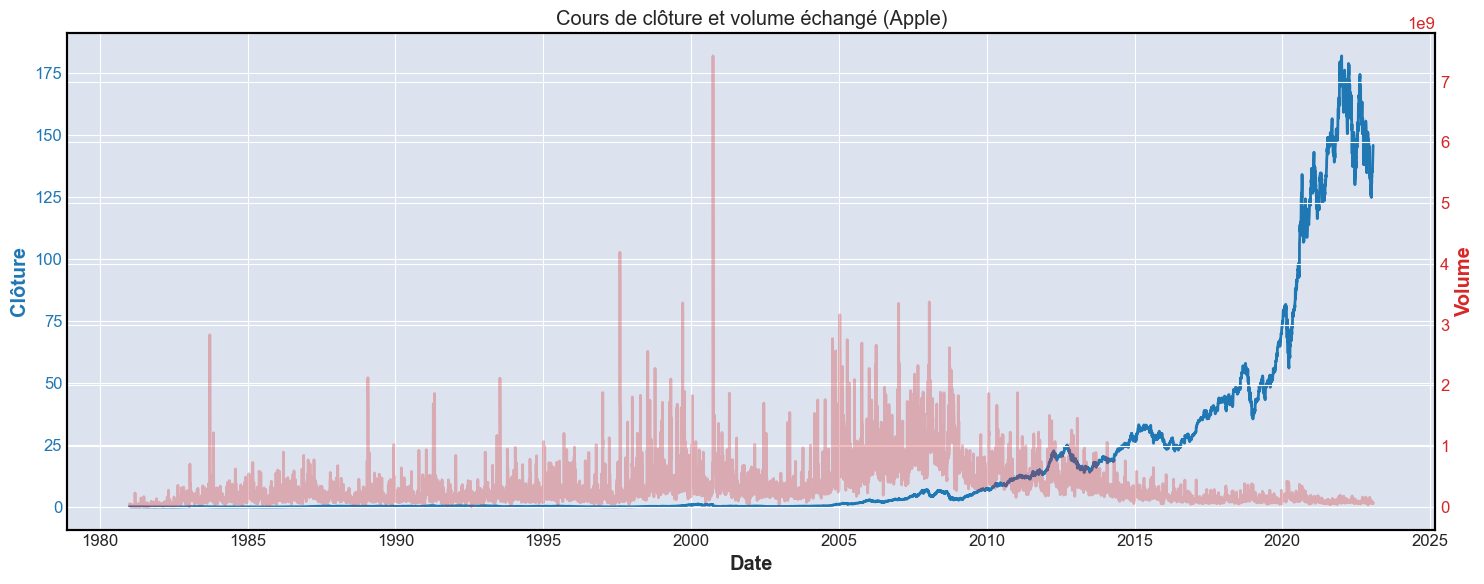

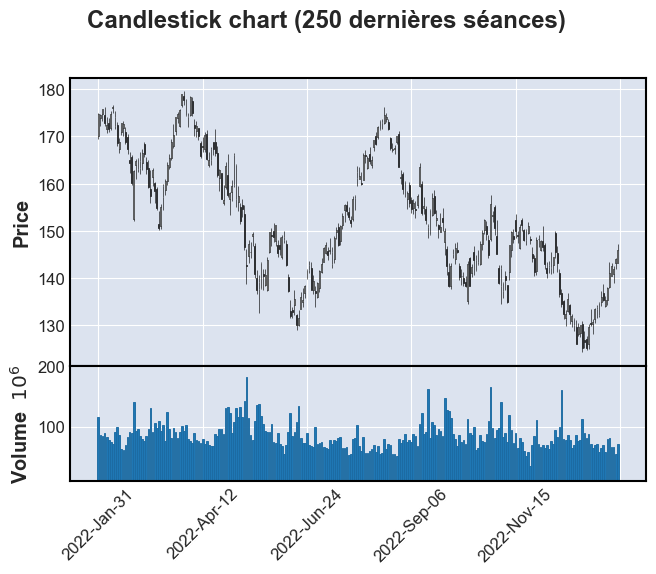

In [ ]:
# Cloture, volume
fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Clôture', color=color)
ax1.plot(df.index, df['Close'], color=color, label='Clôture')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df.index, df['Volume'], color=color, alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Cours de clôture et volume échangé (Apple)")
fig.tight_layout()
plt.show()

# Candlestick chart (nécessite mplfinance) ( Vu sur tuto Chat Gpt)

subset = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Période réduite
nb_jours = 250
candlestick_data = subset.loc[subset.index >= subset.index[-nb_jours]]
mpf.plot(candlestick_data, type='candle', volume=True, title="Candlestick chart (250 dernières séances)")

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


Moyenne clôture : 16.69736201451735, Médiane : 0.487701, Ecart-type : 35.47391163938848


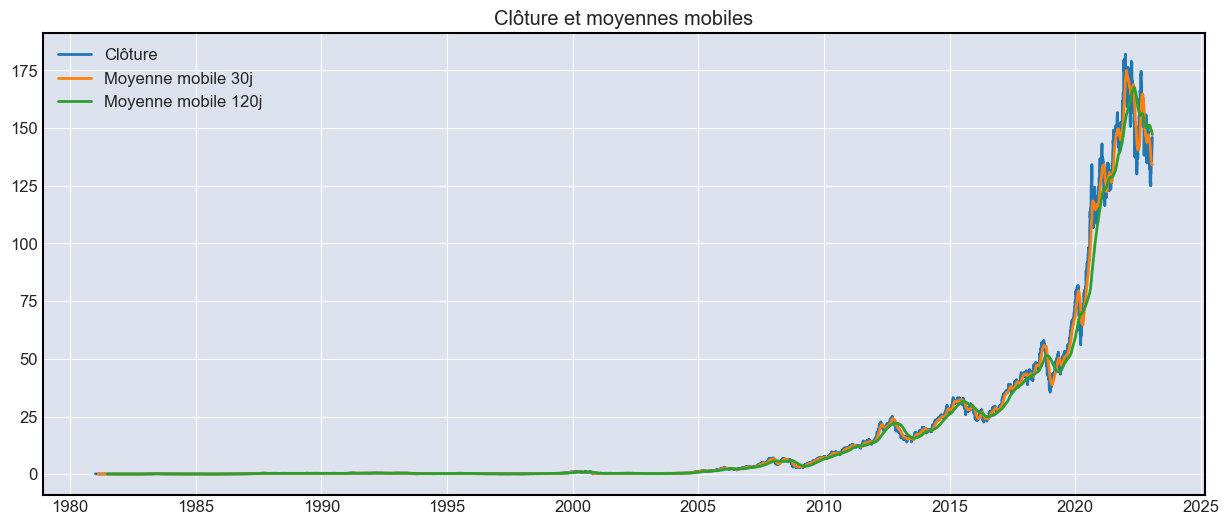

In [19]:
# Description
statsDf = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()
display(statsDf)

# Moyenne, médiane, écart-type
print(f"Moyenne clôture : {df['Close'].mean()}, Médiane : {df['Close'].median()}, Ecart-type : {df['Close'].std()}")

# Moyenne mobile sur 30 et 120 jours ( Rolling Mean)
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_120'] = df['Close'].rolling(window=120).mean()

plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Clôture')
plt.plot(df['MA_30'], label='Moyenne mobile 30j')
plt.plot(df['MA_120'], label='Moyenne mobile 120j')
plt.legend()
plt.title("Clôture et moyennes mobiles")
plt.show()

T-test entre 2021 et 2022 : t=-11.187, p-value=0.0000
Shapiro-Wilk test (retour journalier) : stat=0.906, p-value=0.0000


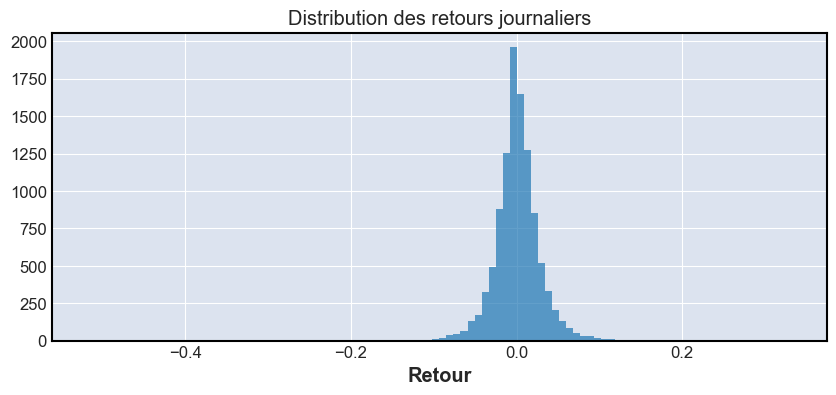

In [20]:
# Comparaison annuelle
df['Year'] = df.index.year

# Aannées récentes (2021/2022)
years = [2021, 2022]
mask1 = df['Year'] == years[0]
mask2 = df['Year'] == years[1]
closes_1 = df[mask1]['Close'].dropna()
closes_2 = df[mask2]['Close'].dropna()

t_stat, p_val = stats.ttest_ind(closes_1, closes_2, nan_policy='omit', equal_var=False)
print(f"T-test entre {years[0]} et {years[1]} : t={t_stat:.3f}, p-value={p_val:.4f}")

# Rendements journaliers :
df['Return'] = df['Close'].pct_change()
returns = df['Return'].dropna()

# Normalite ( Vu sur GPT )
shapiro_stat, shapiro_p = stats.shapiro(returns.sample(5000) if len(returns) > 5000 else returns)
print(f"Shapiro-Wilk test (retour journalier) : stat={shapiro_stat:.3f}, p-value={shapiro_p:.4f}")

plt.figure(figsize=(10, 4))
plt.hist(returns, bins=100, alpha=0.7)
plt.title("Distribution des retours journaliers")
plt.xlabel("Retour")
plt.show()

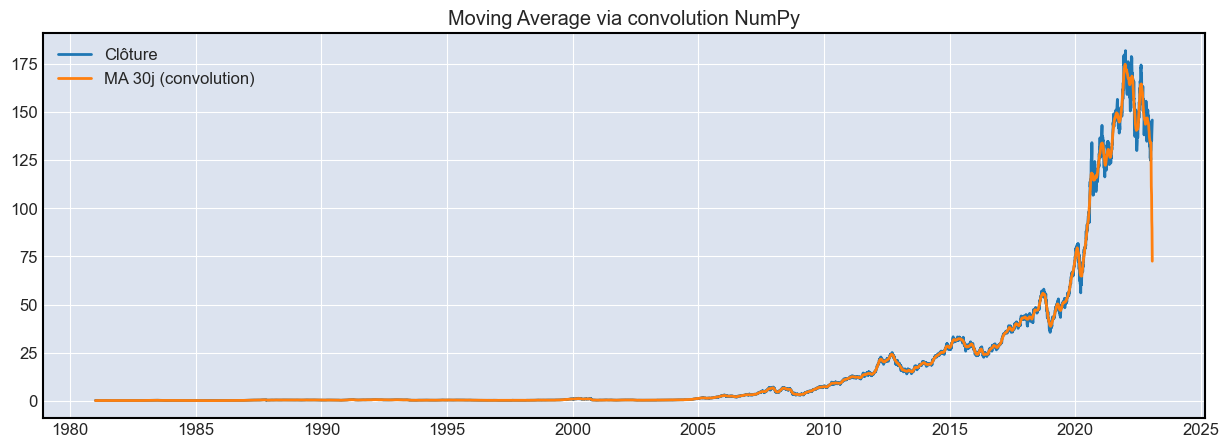

In [21]:
# Convolve ( vu sur gpt )
weights = np.ones(30) / 30
df['MA_conv_30'] = np.convolve(df['Close'], weights, mode='same')

plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label="Clôture")
plt.plot(df['MA_conv_30'], label="MA 30j (convolution)")
plt.legend()
plt.title('Moving Average via convolution NumPy')
plt.show()

Corrélation close/volume : -0.215
Corrélation MA_30/MA_120 : 0.996


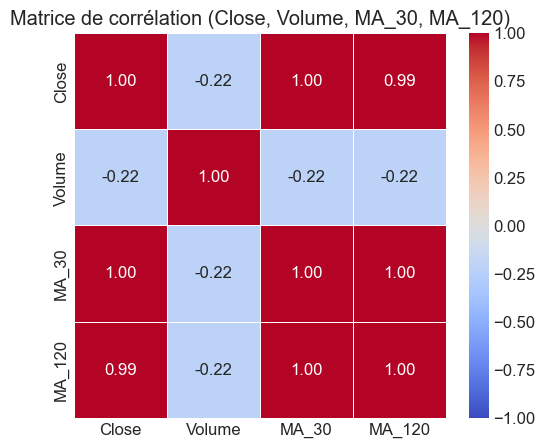

In [25]:
# Corrélation entre volume et prix de clôture
corr = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]
print(f"Corrélation close/volume : {corr:.3f}")

# Corrélation entre moving averages (30j vs. 120j)
df_valid = df[['MA_30', 'MA_120']].dropna()
corr_ma = np.corrcoef(df_valid['MA_30'], df_valid['MA_120'])[0, 1]
print(f"Corrélation MA_30/MA_120 : {corr_ma:.3f}")

# Choix des variables pour la matrice de corrélation
cols_to_corr = ['Close', 'Volume', 'MA_30', 'MA_120']
df_corr = df[cols_to_corr].dropna()  # retire les lignes ayant des NaN sur ANY colonne

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Affichage en heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matrice de corrélation (Close, Volume, MA_30, MA_120)')
plt.show()